# Tarea 0

### Configuración inicial

Primero, se debe crear un entorno virtual para evitar incompatibilidades con el resto del sistema. La celda de abajo se debe copiar y pegar en la terminal antes de correr el notebook.

In [1]:
%%sh
if [ ! -d ".venv" ]; then
    python3 -m venv .venv
    echo "Virtual environment created."
else
    echo "Virtual environment already exists."
fi

Virtual environment already exists.


Luego, se debe crear un entorno virtual e instalar las dependencias de Python necesarias.

In [2]:
import os
import platform

GREEN = '\033[92m'
BLUE = '\033[94m'
YELLOW = '\033[93m'
RED = '\033[91m'
RESET = '\033[0m'

system = platform.system().lower()

if system in ['linux', 'darwin']:  #*Linux or macOS
    activate_script = ".venv/bin/activate"
    print(f"To activate: {GREEN}source {activate_script}{RESET}")
elif system == 'windows':
    activate_script = ".venv\\Scripts\\activate.bat"
    print(f"To activate: {GREEN}{activate_script}{RESET}")
else:
    print(f"{RED}Unknown OS. Please activate manually.{RESET}")

if os.path.exists(".venv"):
    print(f"{BLUE}Virtual environment found.{RESET}")
else:
    print(f"{YELLOW}Virtual environment not found. Please create it first.{RESET}")

To activate: source .venv/bin/activate
Virtual environment found.


In [3]:
%%bash
# Reemplaza esta línea por el código en verde que te apareció en la salida de la celda inmediatamente anterior a esta

In [4]:
!pip install numpy networkx matplotlib scipy pandas ipywidgets

## Parámetros iniciales <a id="param"></a>

In [47]:
p_values: list[float] = [i/10 for i in range (1, 10)]
n_values: list[int] = [n for n in range (2, 100)]

## Funciones extra

Su objetivo es reutilizar código y abstraer diversos procesos para enfocarse en el análisis de complejidad de los dos algoritmos

In [6]:
import numpy as np

def build_p_matrices(chain: int = 1,
                     p_values: list[float] = [n/10 for n in range (1, 10)],
                     n_values: list[float] = [n for n in range(2, 5)]) -> list[np.array]:
    """
    Return all the possible transition matrices
    """
    valid_chains: list[int] = [1, 2, 3]
    if chain not in valid_chains:
        raise ValueError(f"Invalid chain selected. Please choose one of the list: {valid_chains}")
    
    if chain == 1:
        #*Construction of the transition matrices
        matrices: list[np.array] = []
        i: int = 0
        for n in n_values:
            for p in p_values:
                q: float = 1 - p
                matrix: np.array = np.zeros((n, n))
                matrix[0][0] = q
                matrix[n - 1][n - 1] = p
                for i in range (0, n - 1):
                    #*Forward (l to r) -> p
                    matrix[i][i + 1] = p
                    #*Backward (r to l) -> q
                    matrix[i + 1][i] = q
                # print(p, q)
                # print(matrix)

                matrices.append(matrix.T)
                i += 1
        return matrices
    
    if chain == 2:
        return
    
    if chain == 3:
        return
    
def get_distributions(candidates: list[np.array]) -> list[np.array]:
    """
    The distribution should have non-negative entries and the entries in each
    row must sum 1.
    """
    return [v for v in candidates if np.isclose(v.sum(), 1, atol=1e-4) and np.all(v >= 0)]

def print_distributions(valid_candidates: list[list[np.array]]) -> None:
    i: int = 1
    for c in valid_candidates:
        print(f"Stationary distribution of the matrix")
        print(c)
        i += 1


## Cadenas

### Cadena 1

La cadena de Markov que se tratará a continuación es la sugerencia inicial realizada por el docente. Es una cadena irreducible y aperiódica. Una caracterízación y una representación gráfica de esta se puede ver a continuación, así como su simulación.
> - Es irreducible ya que $p, q > 0$.
> - Es aperiódica ya que:
>   - Del estado $i \neq n$ se puede ir al estado $i$ en $2(n - i)$ pasos (yendo al extremo derecho y devolvíendose) y en $2(n - i) + 1$ pasos (quedándose en el extremo, $n$, por un paso). Como $\text{mcd}(2(n - i), 2(n - i) + 1) = 1$, ya está.
>   - Del estado $n$ al estado $n$ se puede ir en $2n$ (yendo al extremo izquierdo y devolvíendose) o en $2n + 1$ pasos (quedándose en el extremo izquierdo, $1$, por un paso).
>   - Del estado $i$ al estado $j$, idea: ir de i a i y luego de i a j, asumiendo i < j, y utilizando lo mismo que en los dos anteriores

[[0.7 0.7 0.  0.  0. ]
 [0.3 0.  0.7 0.  0. ]
 [0.  0.3 0.  0.7 0. ]
 [0.  0.  0.3 0.  0.7]
 [0.  0.  0.  0.3 0.3]]
[(1, 1, 0), (1, 2, 1), (2, 1, 2), (2, 3, 3), (3, 2, 4), (3, 4, 5), (4, 3, 6), (4, 5, 7), (5, 4, 8), (5, 5, 9)]
{(1, 1): '0.70', (1, 2): '0.70', (2, 1): '0.30', (2, 3): '0.70', (3, 2): '0.30', (3, 4): '0.70', (4, 3): '0.30', (4, 5): '0.70', (5, 4): '0.30', (5, 5): '0.30'}


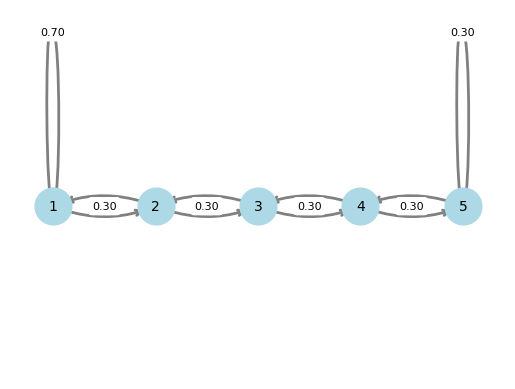

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.MultiDiGraph()
n: int = 5
p: float = 0.3
P: np.array = build_p_matrices(chain=1, p_values=[p], n_values=[n])[0]
states: list[int] = [i for i in range (1, n + 1)]

edges: list[tuple] = []
k: int = 0
for i in range(n):
    for j in range(n):
        if P[i][j] != 0:
            edges.append((i + 1, j + 1, k))
            k += 1

print(P)
print(edges)

# Arrange nodes linearly on the x-axis
pos = {state: (state, 0) for state in states}
G.add_nodes_from(states)
G.add_edges_from(edges)

nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=10, edge_color='gray', width=2, connectionstyle="arc3,rad=0.2")
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

edge_labels = {}
for i in range(n):
    for j in range(n):
        if P[i][j] != 0:
            edge_labels[(i + 1, j + 1)] = f'{P[i][j]:.2f}'

print(edge_labels)

nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

plt.axis('off')
plt.show()

## Métodos para encontrar la distribución estacionaria

Ya que las cadenas presentadas anteriormente son irreducibles y aperiódicas, su distribución estacionaria existe y es única. Ahora, se calculará usando dos métodos diferentes, comparando la eficiencia temporal de estos:

### Hallando los autovectores de $P^\intercal$

Se sabe que una distribución $\pi$ se le llama estacionaria si
$$\pi P = \pi$$
o equivalentemente
$$P^{\intercal} \pi^{\intercal} = \pi^{\intercal}$$
por lo tanto, hallar $\pi$ se reduce a hallar un autovector de la matriz $P^{\intercal}$.

Dicho autovector se hallará utilizando las librerías `numpy` y `scipy`, las más populares en cálculo científico, y `simpy`, una librería de cálculo simbólico. Normalmente, bastaría con la primera, mas sin embargo, como explican en [esta pregunta en StackOverflow](https://stackoverflow.com/questions/6684238/whats-the-fastest-way-to-find-eigenvalues-vectors-in-python), `scipy` identifica diversos tipos de matrices y ajusta los cálculos de los autovectores de acuerdo al mejor algoritmo que aplique para cada tipo. Por otro lado, `simpy` seguramente será la más lenta de las tres, pero proverá una buena indicación de qué tanto tardaría el proceso si se busca exactitud en la solución (o precisión casi infinita).

Ahora, independientemente de qué librería o lenguaje se utilice, es estándar retornar los autovectores normalizados (bajo la norma euclídea estándar). Por lo tanto, se deberá hacer un cálculo extra para asegurar que al menos uno de los autovectores $v$ cumpla que $\sum_{i = 1}^{n}v_i = 1$ y que $0 \leq v_i \leq 1$ para todo $i \in \{1, ..., n\}$. Este consiste en computar un escalar $x \in \mathbb{R}$ tal que

$$\frac{\sum_{i = 1}^n v_i}{x} = 1 \iff x = \sum_{i = 1}^n v_i$$

y dividir a cada componente del vector $v$ para obtener un candidato a distribución estacionaria $v' = (\frac{v_1}{x}, \frac{v_2}{x}, ..., \frac{v_n}{x})$.

#### Cadena 1

In [48]:
matrices = build_p_matrices(chain=1, p_values=p_values, n_values=n_values)

In [9]:
#!Consider creating an object that stores all the matrices with n states to have a better reference when printing

In [10]:
import scipy

def stationary_candidates_scipy(matrix) -> list[np.array]:
    # print("   Using scipy...")
    candidates: list[np.array] = []
    # print(f"Candidates for the matrix")
    eigen_values, eigen_vectors = scipy.linalg.eig(matrix)
    for v in eigen_vectors:
        candidates.append(v / v.sum())
    return get_distributions(candidates)


In [11]:
for matrix in matrices:
    print_distributions(stationary_candidates_scipy(matrix))
#!Precission issue


Stationary distribution of the matrix
[0.38742589 0.61257411]
Stationary distribution of the matrix
[0.61257411 0.38742589]
Stationary distribution of the matrix
[0.22210763 0.40732446 0.3705679 ]
Stationary distribution of the matrix
[0.30149546 0.50301982 0.19548471]
Stationary distribution of the matrix
[0.10680805 0.17978474 0.31139631 0.4020109 ]


In [12]:
def stationary_candidates_numpy(matrix):
    candidates: list[np.array] = []
    # print(f"Candidates for {i}th matrix")
    eigen_values, eigen_vectors = np.linalg.eig(matrix)
    for v in eigen_vectors:
        candidates.append(v/v.sum())
    # print(candidates)

    return get_distributions(candidates)



In [13]:
for matrix in matrices:
    print_distributions(stationary_candidates_numpy(matrix))

Stationary distribution of the matrix
[0.38742589 0.61257411]
Stationary distribution of the matrix
[0.61257411 0.38742589]
Stationary distribution of the matrix
[0.22210763 0.40732446 0.3705679 ]
Stationary distribution of the matrix
[0.30149546 0.50301982 0.19548471]
Stationary distribution of the matrix
[0.10680805 0.17978474 0.31139631 0.4020109 ]


### Usando la fórmula de recurrencia

Ya que las cadenas trabajadas son homogéneas, aperiódicas e irreducibles, la distribución estacionaria es única por el teorema 5.3 visto en clase. Además, por ejercicio ... (realizar ejercicio), se sabe que esta distribución tendrá la forma
$$\pi = \left(\frac{1}{\mathbb{E}_1[T_1^+]}, \frac{1}{\mathbb{E}_2[T_2^+]}, ..., \frac{1}{\mathbb{E}_n[T_n^+]}\right) = \left(\frac{1}{r_1}, \frac{1}{r_2}, ..., \frac{1}{r_n}\right)$$
Además, para todo $i \in \{1, ..., n\}$, $r_i := \mathbb{E}_i[T_i^+] = 1 + \sum_{j \in S}P_{ij} t_{j, \{i\}}$, y como $t_{i, \{i\}} := \mathbb{E}_i[T_i] = 0$ (pues si $X_0 = i, ya se está en el estado al que se quería retornar), se puede descartar el caso en que $j = i$. Luego, 
$$r_i = \mathbb{E}_i[T_i^+] = 1 + \sum_{j \in S, j \neq i}P_{ij} t_{j, \{i\}} = (\pi_i)^{-1}$$
donde $\pi$ es la distribución estacionaria de cada cadena, $P$ es la matriz de transición de la cadena, y $t_{j, \{i\}} := \mathbb{E}_i[T_{\{i\}}] = 1 + \sum_{j \in S^t} P_{ij} t_{j, \{i\}}$ el tiempo medio de llegada al estado $i$ desde el estado $j$.

La forma de calcular los tiempos medios de llegada a un estado desde otro es recurrentemente, es decir, se va formando un sistema de ecuaciones con los $i, j \in S$ necesarios para poder calcular los $t_{j, \{i\}}$ requeridos. Este cálculo se realizará a continuación representando dicho sistema como una matriz que va creciendo a medida en que se requiren más $t_{j, \{i\}}$.

Idea: hacer un llamado recurrente cada que se necesite un $t_{ij}$ e irlos almacenando en una lista. Hacer una máscara con los elementos de la suma que sean $0$ (e.g., $t_{ii}$); si el único no sero es el $t_{ij}$ requerido, se puede calcular con una suma directa. De otro modo, se buscarán los $t_{ik}$ necesarios en la lista, y si no están, se hace un llamado recurrente.

In [14]:
matrices = build_p_matrices(chain=1, p_values=[n/10 for n in range (1, 10)], n_values=[n for n in range(2, 10)])

In [65]:
import numpy as np

def calculate_st_distr_rf(matrix: np.array) -> np.array:
    """
    Function to calculate the stationary distribution of a Markov chain
    with transition matrix `matrix` using the recurrence formulas
    """
    r: list[float] = []
    for i in range(matrix.shape[0]):
        r.append()

# def t(i: int, j: int, n: int, t_kj: list[float] = None):
#     """
#     Mean return time to state j starting from state 1. It is the same as
#     to t_{i, A} considering A to be the singleton of j.
#     It will be calculated as follows: the elements in t_kj will be
#     t_{k,\{j\}} for k a state of the chain. If one of those is None, 
#     """

def generate_t_matrix(P:np.array) -> np.array:
    """
    Returns a n^2 x n^2 matrix T whose entry
    (i, j) = (q_1 n + r_1, q_2 n + r_2) (where q_i, r_i are obtained using
    the division algorithm)
    - is 0 if i \not \in \{1, 2 + n, ..., i + (i-1)n, ..., n + n\},
    i.e., it doesn't correspond to a mean return time in the form
    t_{k, j}, where k is any state of the chain.
    - is P_{r_1, r_2}, a.k.a., P_{i, k}, otherwise.
    """
    n: int = P.shape[0]
    T: np.array = np.zeros(shape=(n*n, n*n))
    # print(T)
    #!Consider addin a rule for t_i,i to be  0
    #*Filling the non-zero values of t(i, j)
    for i in range(n):
        for j in range(n):
            if j == i:
                j += 1
                continue
            n_mult: int = 0 #*n multiplier
            for k in range(n):
                #*Since k starts from 0, there is no need to multiply n by k - 1
                k_val: int = i + j*n
                j_val: int = j + n*k
                i_val: int = i
                print(i, k, P[i][k], (i*n + j, j + n*k))
                T[i*n + j, j + n*k] = P[i][k]
                # print(i, j, k, P[i][k], (i*n + j, k + n*k))
    for i in range(n*n):
        T[i][i] -= 1
    for i in range(n):
        T[i*(n+1)][i*(n+1)] = 0

    return T

def pretty_print(M: np.array, h_indices: list[str] = None, v_indices: list[str] = None) -> None:
    if h_indices is None:
        h_indices = [i for i in range(M.shape[1])]
    if v_indices is None:
        v_indices = [i for i in range(M.shape[0])]

    n_rows, n_cols = M.shape
    # Determine column width based on the longest h_indices string (at least 7)
    col_width = max(8, max(len(str(idx)) for idx in h_indices) + 1)
    # Print column indices
    print(" " * (col_width + 1), end="")
    for index in h_indices:
        print(f"{index:>{col_width}}", end="")
    print()
    # Print each row with its index
    for row in range(n_rows):
        print(f"{v_indices[row]:>3} |", end="")
        for col in range(n_cols):
            print(f"{M[row, col]:{col_width}.2f}", end="")
        print()
    
def generate_index_labels(prefix: str, n: int, m: int) -> list[str]:
    """
    Returns a list of strings in the format 'prefix(i, j)' for i in range(1, n + 1),
    j in range(1, m+1), listed in lexicographical order.
    """
    return [f"{prefix}({i}, {j})" for i in range(1, n+1) for j in range(1, m+1)]

# def get_necessary_tijs(i: int, j: int, n: int, T:np.array, N: np.array) -> np.array:
#     #*First, map the non-zero entries of row i to 1's
#     print(i*n + j)
#     print("T[i,j]", T[i*n + j])
#     N_row = (T[i*n + j] != 0).astype(int)
#     print("N_row", N_row)
#     non_zero_indices = np.nonzero(N_row)[0]
#     print("NN indices", non_zero_indices)
#     non_zero_count = np.count_nonzero(T[i*n + j])
#     print((i, j), N_row)
#     already_in_N = np.count_nonzero(np.logical_and(N_row, N.flatten()))
#     if already_in_N == non_zero_count:
#         return N
#     else:
#         for index in non_zero_indices:
#             N = get_necessary_tijs(index%n, index//n, n, T, N)

def get_necessary_tijs(i: int, j: int, n: int, T: np.array, syst: list[np.array], bool_map: list[list[bool]]) -> int:
    if i == j:
        return 0
    map: list[list[bool]] = bool_map
    map[i][j] = 1
    syst.append(T[n*i + j])
    # print("Bool map", bool_map)
    # print("System of equations", syst)
    for k in range(n):
        if k == j:
            pass
        elif bool_map[k][j] == 0:
            syst, map = get_necessary_tijs(k, j, n, T, syst, map)
    return syst, map

def chop_system(S: np.array, n: int) -> np.array:
    chopped: np.array = S
    #*Remove the t_{i, i} entries
    for i in range(n):
        #*Although we are chopping the i*(n+1)-th column of the original
        #*system, every deletion subtracts 1 to the number of columns,
        #*so it ends up being the i*n-th column
        chopped = np.delete(chopped, i*n, axis=1)
    #*Remove columns that are all zeros (not necessary in the system)
    chopped = chopped[:, ~np.all(chopped == 0, axis=0)]
    return chopped

def solve_system(S: np.array) -> np.array:
    solution: np.array = np.linalg.solve(S, -np.ones(S.shape[0]))
    solution = solution
    return solution


<>:25: SyntaxWarning: invalid escape sequence '\i'
<>:25: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_8889/1476697409.py:25: SyntaxWarning: invalid escape sequence '\i'
  - is 0 if i \not \in \{1, 2 + n, ..., i + (i-1)n, ..., n + n\},


In [67]:
P: np.array = np.array(
    [[1/4, 1/4, 1/2],
     [1/2, 1/4, 1/4],
     [1/3, 1/3, 1/3]]
)
n: int = P.shape[0]
bool_map = [[0 for j in range(n)] for i in range(n)]
T: np.array = generate_t_matrix(P)
i: int = 1
j: int = 0
syst, map = get_necessary_tijs(i, j, 3, T, [], bool_map)
syst_matrix = np.vstack(syst)

indices: list[str] = generate_index_labels("T", P.shape[0], P.shape[1])
pretty_print(T, indices, indices)

print("Final system of equations:")
chopped: np.array = chop_system(syst_matrix, n)
print(chopped)

solution: np.array = solve_system(chopped)
print("Solution vector:", solution)
result = chopped @ solution
print(result)
print(f"t_({i+1}, {j+1}) = {solution[0]}")

#TODO: Subtract the t_i, j in the left side of the equations when creating the T matrix. That way, the chopped system will actually be the one we want to solve, with the left side of it being a vector of -1's. In other words, the system would be syst * x = -1, and x will be the correct values of the t_i, j 's

0 0 0.25 (1, 1)
0 1 0.25 (1, 4)
0 2 0.5 (1, 7)
0 0 0.25 (2, 2)
0 1 0.25 (2, 5)
0 2 0.5 (2, 8)
1 0 0.5 (3, 0)
1 1 0.25 (3, 3)
1 2 0.25 (3, 6)
1 0 0.5 (5, 2)
1 1 0.25 (5, 5)
1 2 0.25 (5, 8)
2 0 0.3333333333333333 (6, 0)
2 1 0.3333333333333333 (6, 3)
2 2 0.3333333333333333 (6, 6)
2 0 0.3333333333333333 (7, 1)
2 1 0.3333333333333333 (7, 4)
2 2 0.3333333333333333 (7, 7)
          T(1, 1) T(1, 2) T(1, 3) T(2, 1) T(2, 2) T(2, 3) T(3, 1) T(3, 2) T(3, 3)
T(1, 1) |    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
T(1, 2) |    0.00   -0.75    0.00    0.00    0.25    0.00    0.00    0.50    0.00
T(1, 3) |    0.00    0.00   -0.75    0.00    0.00    0.25    0.00    0.00    0.50
T(2, 1) |    0.50    0.00    0.00   -0.75    0.00    0.00    0.25    0.00    0.00
T(2, 2) |    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
T(2, 3) |    0.00    0.00    0.50    0.00    0.00   -0.75    0.00    0.00    0.25
T(3, 1) |    0.33    0.00    0.00    0.33    0.00    0.00 

In [31]:
chopped[0][1]

np.float64(3.0)

In [15]:
P: np.array = np.array(
    [[1/2, 1/2, 0],
     [0, 1/3, 2/3],
     [1/2, 1/2, 0]]
)
T = generate_t_matrix(P)
indices: list[str] = generate_index_labels("T", P.shape[0], P.shape[1])
pretty_print(T, indices, indices)
get_tij_matrix(2, 1, P.shape[0], T)


0 0 0.5 (1, 1)
0 1 0.5 (1, 4)
0 2 0.0 (1, 7)
0 0 0.5 (2, 2)
0 1 0.5 (2, 5)
0 2 0.0 (2, 8)
1 0 0.0 (3, 0)
1 1 0.3333333333333333 (3, 3)
1 2 0.6666666666666666 (3, 6)
1 0 0.0 (5, 2)
1 1 0.3333333333333333 (5, 5)
1 2 0.6666666666666666 (5, 8)
2 0 0.5 (6, 0)
2 1 0.5 (6, 3)
2 2 0.0 (6, 6)
2 0 0.5 (7, 1)
2 1 0.5 (7, 4)
2 2 0.0 (7, 7)
          T(1, 1) T(1, 2) T(1, 3) T(2, 1) T(2, 2) T(2, 3) T(3, 1) T(3, 2) T(3, 3)
T(1, 1) |    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
T(1, 2) |    0.00    0.50    0.00    0.00    0.50    0.00    0.00    0.00    0.00
T(1, 3) |    0.00    0.00    0.50    0.00    0.00    0.50    0.00    0.00    0.00
T(2, 1) |    0.00    0.00    0.00    0.33    0.00    0.00    0.67    0.00    0.00
T(2, 2) |    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
T(2, 3) |    0.00    0.00    0.00    0.00    0.00    0.33    0.00    0.00    0.67
T(3, 1) |    0.50    0.00    0.00    0.50    0.00    0.00    0.00    0.00    0.00
T(3, 2) |    0

/tmp/ipykernel_8889/130663555.py:25: SyntaxWarning: invalid escape sequence '\i'
  - is 0 if i \not \in \{1, 2 + n, ..., i + (i-1)n, ..., n + n\},


TypeError: get_necessary_tijs() missing 1 required positional argument: 'bool_map'

**Considerar el ejemplo en el que la distr es (1, 0, 0, 0, 0) como argumento a favor de los autovectores**

## Análisis de complejidad temporal

Cada función será llamada usando el wrapper `timed_exec`, que medirá el tiempo en que se demoró en ejecutar la función enviada como argumento.

In [49]:
import time

def timed_run(func, *args, **kwargs):
    start = time.perf_counter()
    func(*args, **kwargs)
    end = time.perf_counter()
    elapsed = end - start
    return elapsed

Cada método se ejecutará con todas las posibles combinaciones de los [parámetros iniciales](#param) definidos al inicio del notebook, y su tiempo de ejecución se guardará en un DataFrame que se analizará a continuación

In [50]:
import pandas as pd

results: pd.DataFrame = pd.DataFrame(columns=["n", "p", "NumPy", "SciPy"])

i: int = 0
for n in n_values:
    for p in p_values:
        elapsed_time_numpy: float = timed_run(stationary_candidates_numpy, matrices[i])
        elapsed_time_scipy: float = timed_run(stationary_candidates_scipy, matrices[i])
        results.loc[len(results)] = {"n": n, "p": p, "NumPy": elapsed_time_numpy, "SciPy": elapsed_time_scipy}
        i += 1

results

,n,p,NumPy,SciPy
0,2,0.1,0.000279,0.000267
1,2,0.2,0.000159,0.000180
2,2,0.3,0.000817,0.000282
3,2,0.4,0.000115,0.000100
4,2,0.5,0.000090,0.000085
...,...,...,...,...
877,99,0.5,0.004702,0.005568
878,99,0.6,0.006391,0.007175
879,99,0.7,0.006749,0.006360
880,99,0.8,0.006384,0.005946


### Gráficas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def plot_time_execution(times_df: pd.DataFrame, x_axis: str = 'n') -> None:
    if x_axis == "n":
        fig, ax = plt.subplots(figsize=(18, 6))
        try:
            ax.plot(times_df['n'], times_df['NumPy'], lw=1.6, color='green', label='Autovectores (NumPy)')
            ax.plot(times_df['n'], times_df['SciPy'], lw=1.6, color='red', label='Autovectores (SciPy)')
            ax.plot(times_df['n'], times_df['Recurrence'], lw=1.6, color='red', label='Fórmula de recurrencia')
        except KeyError as e:
            print("Missing at least one column:", e)
        
        ax.set_title("Tiempo de ejecución de cada algoritmo")
        ax.set_ylabel("Tiempo")
        ax.set_xlabel("n (número de estados)")
        ax.grid(True, alpha=0.2)
        ax.legend(loc="upper left")
        plt.show()

    elif x_axis == "p":
        fig, ax = plt.subplots(figsize=(18, 6))
        try:
            #*Add a small offset to each set of dots to avoid overlap
            offset = 0.01
            ax.plot(times_df['p'] - offset, times_df['NumPy'], 'o', color='green', label='Autovectores (NumPy)')
            ax.plot(times_df['p'], times_df['SciPy'], 'o', color='red', label='Autovectores (SciPy)')
            ax.plot(times_df['p'] + offset, times_df['Recurrence'], 'o', color='blue', label='Fórmula de recurrencia')
        except KeyError as e:
            print("Missing at least one column:", e)
        
        ax.set_title("Tiempo de ejecución de cada algoritmo")
        ax.set_ylabel("Tiempo")
        ax.set_xlabel("p (probabilidad de referencia)")
        ax.grid(True, alpha=0.2)
        ax.legend(loc="upper left")
        plt.show()

def make_ui(times_df: pd.DataFrame) -> None:
    dropdown = widgets.Dropdown(
        options=[('n (número de estados)', 'n'), ('p (probabilidad de referencia)', 'p')],
        value='n',
        description='Eje X:',
        style={'description_width': 'initial'}
    )

    output = widgets.Output()

    def on_change(change):
        if change['type'] == 'change' and change['name'] == 'value':
            with output:
                clear_output(wait=True)
                plot_time_execution(times_df, x_axis=change['new'])

    dropdown.observe(on_change)

    display(dropdown, output)
    # Initial plot
    with output:
        plot_time_execution(times_df, x_axis=dropdown.value)

In [ ]:
#TODO: Consider plotting the max, min and mean times for each graph

In [ ]:
make_ui(results)

Dropdown(description='Eje X:', options=(('n (número de estados)', 'n'), ('p (probabilidad de referencia)', 'p'…

Output()